<a href="https://colab.research.google.com/github/irfan7210/Rossman-Retail-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_by_1st_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>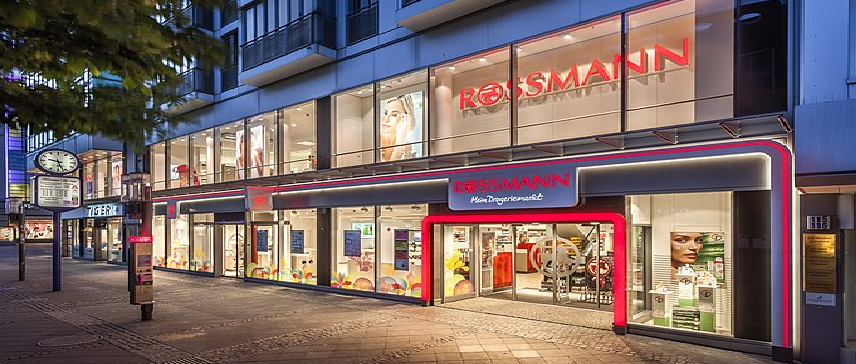

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### **Id** - an Id that represents a (Store, Date) duple within the test set
* #### **Store** - a unique Id for each store
* #### **Sales** - the turnover for any given day (this is what you are predicting)
* #### **Customers** - the number of customers on a given day
* #### **Open**- an indicator for whether the store was open: **0 = closed**, **1 = open**
* #### **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. **a = public holiday, b = Easter holiday, c = Christmas, 0 = None**
* #### **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* #### **StoreType** - differentiates between 4 different store models: **a, b, c, d**
* #### **Assortment** - describes an assortment level: **a = basic**,**b = extra**,**c = extended** 
* #### **CompetitionDistance** - distance in meters to the nearest competitor store
* #### **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* #### **Promo2**- Promo2 is a continuing and consecutive promotion for some stores:**0 = store is not participating**, **1 = store is participating**
* #### **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in **Promo2**
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.**E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store**

In [ ]:
#Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import warnings    
warnings.filterwarnings('ignore')
from pandas._libs.tslibs.parsing import parse_datetime_string

In [ ]:
#Loading Google drives
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#Loading CSV files from google drive.Here we have two data frame sales_df and stores_df
sale_df = pd.read_csv("/content/drive/MyDrive/Copy of Rossmann Stores Data.csv")
stores_df = pd.read_csv("/content/drive/MyDrive/Copy of store.csv")

#Getting information from sale_df dataframe

In [ ]:
#Showing top 5 columns from sales_df data frame
sale_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#Checking number of rows and columns
sale_df.shape

(1017209, 9)

In [ ]:
#Checking for data type and null values.
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Number of null values in sale df
sale_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There is no null values in any column of sale_df dataframe and it has datatype=integer,object,datetime.

#Getting information from Stores_df dataframe.

In [ ]:
#Showing top 5 columns from Stores_df dataframe
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#Checking for datatype and null values of each column of stores_df dataframe
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Null values in stores df
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Here we have found that there are some null values in some columns.Here datatypes are=integer,object,float

In [ ]:
#sale_df['CompetitionOpenSinceMonth'].fillna(sales1['CompetitionOpenSinceMonth'].mode(), inplace = True)
#sale_df['CompetitionOpenSinceYear'].fillna(sales1['CompetitionOpenSinceYear'].mode(), inplace = True)

#Merging both dataFrame stores_df and sales_df

In [ ]:
# Here we are performing left join to merge both data frame
sales_store = pd.merge(sale_df, stores_df, on='Store', how='left')

In [ ]:
# Showing top 5 rows of Sales1
sales_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#checking sales_store dataframe information after merging 
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
# Checking for null values after merging both data frame
sales_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

#Handling Nan values after merging of both data frame.

In [ ]:
#Filling null values in sales_store dataframe
# here we are filling the null values of numerical column by median of data of particular column
sales_store['CompetitionDistance'].fillna(sales_store['CompetitionDistance'].median(), inplace = True)
# Here we are filling null values of categorical column by mode of the data of the particular column
sales_store['CompetitionOpenSinceMonth'].fillna(sales_store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
sales_store['CompetitionOpenSinceYear'].fillna(sales_store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# Here we are filling null values by 0
sales_store['Promo2SinceWeek'].fillna(value=0,inplace=True)
sales_store['Promo2SinceYear'].fillna(value=0,inplace=True)
sales_store['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
# Checking information of data after removing null values
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
#Checking for null values after handling null values
sales_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# Here we are converting date column into date time format
sales_store['Date'] = pd.to_datetime( sales_store[ 'Date' ] )
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

# **Exploratory Data Analysis**

  ## EDA on Categorical features

### Bar plot between Categorical Features and Sales

In [ ]:
#Here we are creating a categorical column list so that we can use all categorical columns for further use. 
categorical_independent_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
#Here we are checking the unique values in each categorical columns.
for col in categorical_independent_variables:
  print(f'Unique values for {col}: {sales_store[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


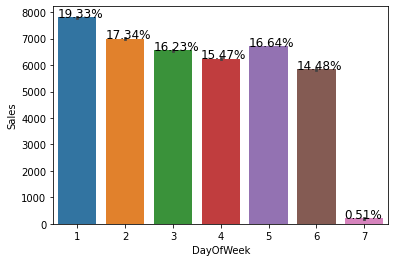

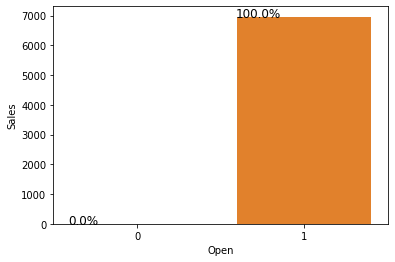

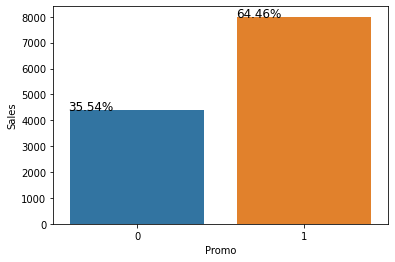

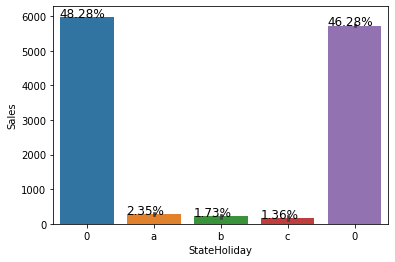

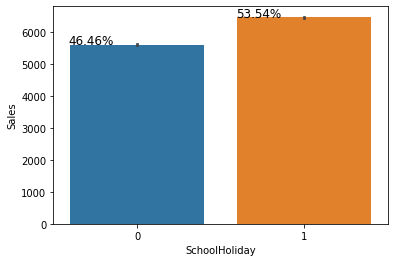

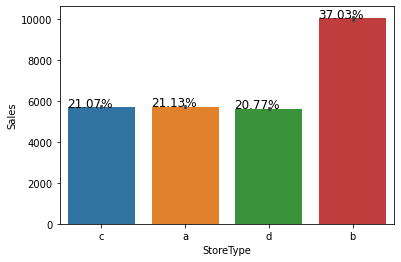

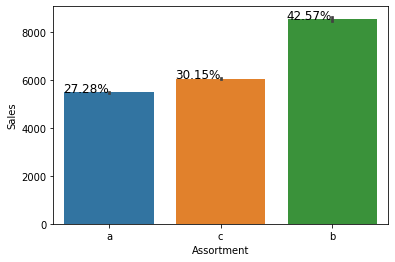

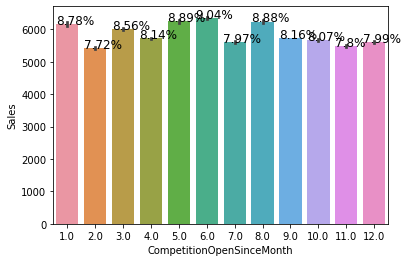

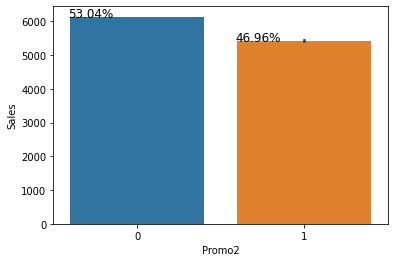

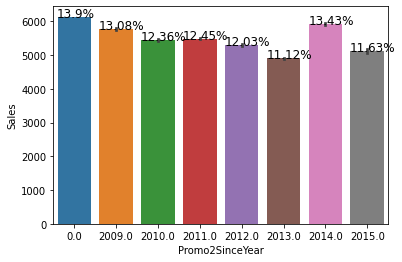

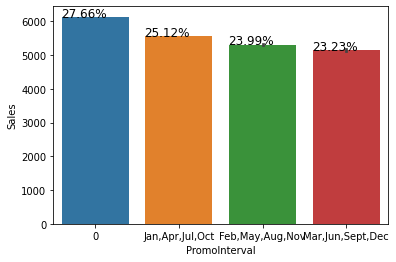

In [ ]:
# Here we are plotting the bar graph between different categorical variables and Sales that is our dependent variables
categorical_independent_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_independent_variables:
  ax = sns.barplot(x=sales_store[value], y=sales_store['Sales'])
  #now here trying to show percentage at bar plot
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()

### Relation between assortment levels and store type on the basis of sales

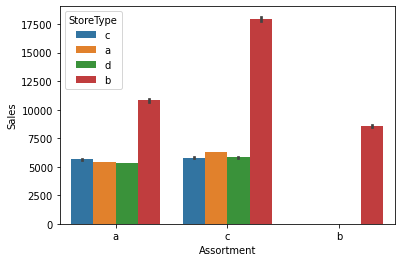

In [ ]:
#Here we are finding  relationship between assortment levels,store type and sales
sns.barplot(x=sales_store["Assortment"],y=sales_store['Sales'],hue=sales_store["StoreType"])

Here we can see that in assortment level '**a**' and '**c**' all the types of stores are present but in assortment level '**b**' only store type '**b**'is present.

###Percentage of stores having assortment levels.

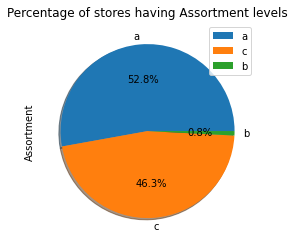

In [ ]:
# here we are plotting pie plot to show percentage of assortment levels.
sales_store['Assortment'].value_counts().plot.pie(title='Percentage of stores having Assortment levels', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

Here we can see that most of stores have assorment level a=basic (52.8%) store,very less store in assortment level b=extended (0.8%)

### Sales of each store in each month.

In [ ]:
# Here we are checking sales of each store in each month.
plt.figure(figsize=(20,10))
sns.barplot(x=sales_store['Month'] , y=sales_store['Sales'],hue=sales_store['StoreType'])

KeyError: ignored

<Figure size 1440x720 with 0 Axes>

Here we can see that store type 'd' has getting maximum sales in each months.As compare to other types of store types.

## EDA on Continuous Features

### Scatter plot between Customers and Sales

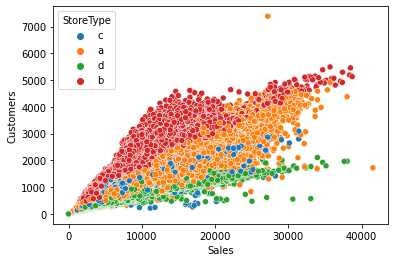

In [ ]:
# Checking relation between stores and competition distance by scatter plot
sns.scatterplot(x=sales_store['Sales'], y=sales_store['Customers'],hue=sales_store['StoreType'])

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales

###Scatter plot between competition distance and Sales on the basis of store type.

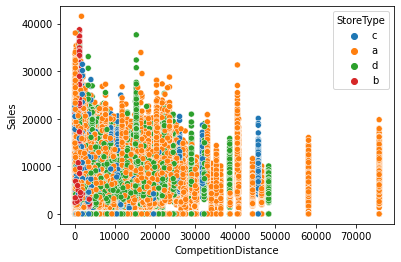

In [ ]:
#Checking relation between how sales of different stores varies with competition distance.
sns.scatterplot(x=sales_store['CompetitionDistance'], y=sales_store['Sales'],hue=sales_store['StoreType'])

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

### Heat Map

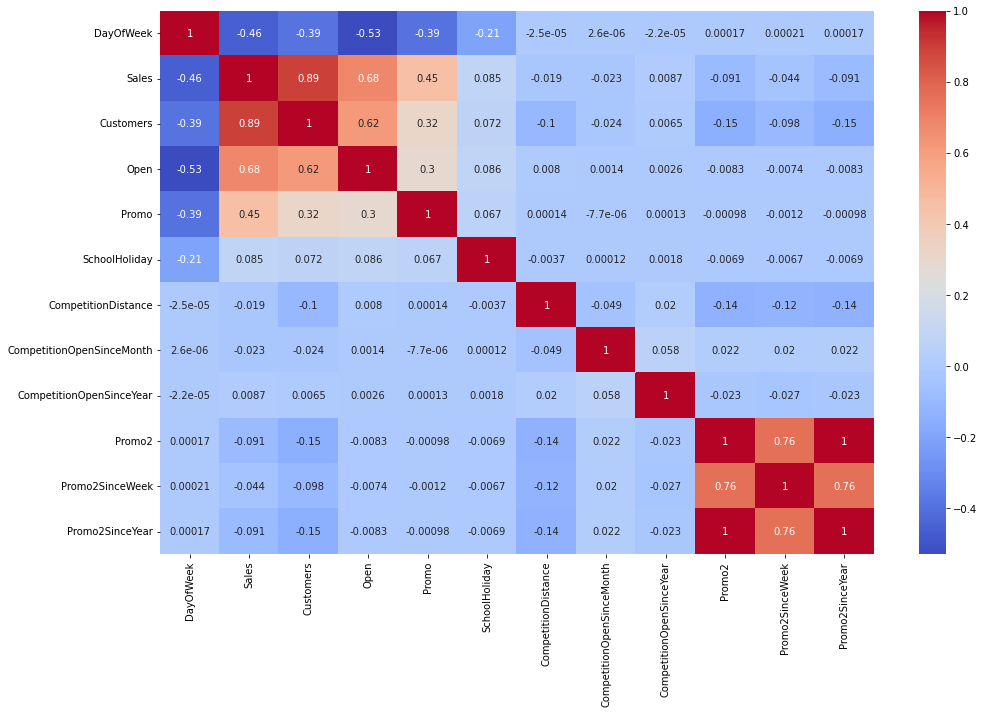

In [ ]:
#Plotting heat map between differen variables to check the correlation between variables.
plt.figure(figsize=(16,10))
sales_corr_df = sales_store.drop(columns = "Store", axis =1)
sns.heatmap(sales_corr_df.corr(), cmap="coolwarm", annot=True)

There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.

### lets check sales distribution

Text(0.5, 0, 'Sales')

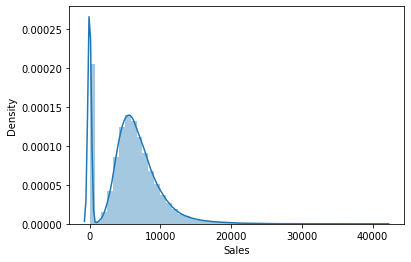

In [ ]:
# Here we have drawn a density curve of sales.
sns.distplot(x=sales_store['Sales'], hist = True)
plt.xlabel('Sales')

Here we can see that  sales density curve is Rightly Skewed.Here we can also see that at starting there is drastically decrease in sales.It may happen due to various factors .

In [ ]:
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

###Average sale of each type of store.

In [ ]:
#x=print(sales_store[sales_store['StoreType'] == 'a']['Sales'].mean())
x=sales_store[sales_store['StoreType'] == 'a']['Sales'].mean()
y=sales_store[sales_store['StoreType'] == 'b']['Sales'].mean()
z=sales_store[sales_store['StoreType'] == 'c']['Sales'].mean()
n=sales_store[sales_store['StoreType'] == 'd']['Sales'].mean()
print(f'The average sale of store a = {x}')
print(f'The average sale of store b = {y}')
print(f'The average sale of store c = {z}')
print(f'The average sale of store d = {n}')

The average sale of store a = 5561.632010398331
The average sale of store b = 8719.682754264055
The average sale of store c = 5607.661407483192
The average sale of store d = 5573.905666768932


Here we can see that store type 'd' has getting maximum sales in each months.As compare to other types of store types.

#Feature Engineering

##  Handling outliers in Sales

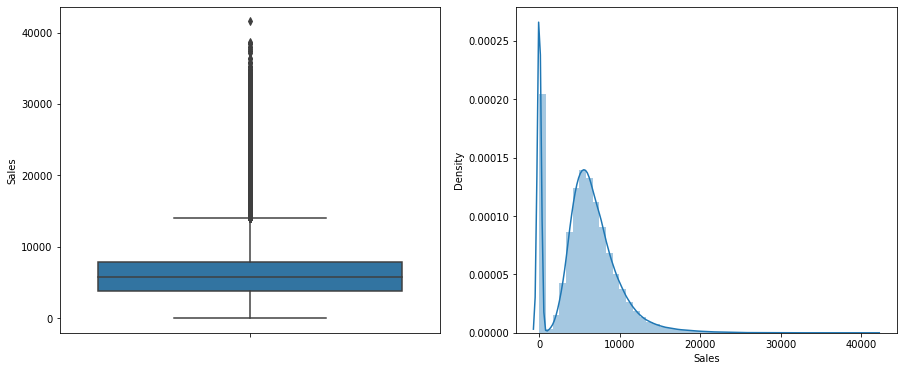

In [ ]:
# here we are plotting box plot to see outliers.
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=sales_store["Sales"])
fig.set_title('')
fig.set_ylabel("Sales")
# Here we are plottig distribution plot of sales data.    
plt.subplot(1, 2, 2)
fig = sns.distplot(sales_store["Sales"])

fig.set_xlabel("Sales")

plt.show()

In [ ]:
#Capping the outlier rows with Percentiles
upper_lim = sales_store["Sales"].quantile(.95)
lower_lim = sales_store["Sales"].quantile(.05)
sales_store.loc[(sales_store["Sales"] > upper_lim),"Sales"] = upper_lim
sales_store.loc[(sales_store["Sales"] < lower_lim),"Sales"] = lower_lim

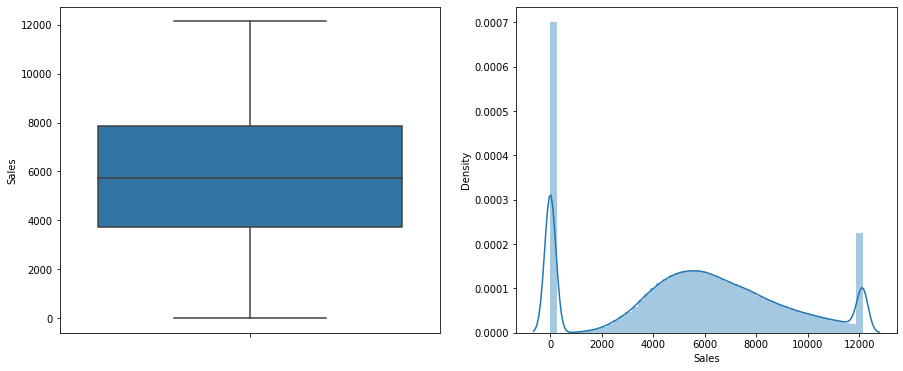

In [ ]:
# After removing the outliers
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=sales_store["Sales"])
fig.set_title('')
fig.set_ylabel("Sales")
# Here we are plottig distribution plot of sales data.    
plt.subplot(1, 2, 2)
fig = sns.distplot(sales_store["Sales"])

fig.set_xlabel("Sales")

plt.show()

Here we have removed outliers of sales data by caping the outliers.In distribution plot we can see that there are 0 sales due to the stores temporarily closed due to refurbishment.

In [ ]:
# Here we are separating Date ,month,year and forming a new column
sales_store["Date"] = pd.to_datetime(sales_store["Date"])
sales_store["Year"] = sales_store["Date"].dt.year
sales_store["Month"] = sales_store["Date"].dt.month
sales_store["Week"] = sales_store["Date"].dt.week%4
sales_store["WeekOfYear"] = sales_store["Date"].dt.week